In [6]:
%run Agents.ipynb
%run Probability.ipynb
%run MarketMacro.ipynb
%run Inflation.ipynb
import networkx as nx

def CreateRandomGraph(numberOfVertices, probability):
    
    graph = nx.DiGraph()
    startingPrice = 1
    
    for x in range(numberOfVertices):
        
        newAgent = AgentBase.CreateRandom()
        graph.add_node(newAgent)
        
        for node in graph.nodes:
            
            if newAgent == node:
                continue
                
            if ProductType.IsProducedFrom(newAgent.ProductType, node.ProductType):
                if probability.TryLuck():
                    graph.add_edge(node, newAgent, price=startingPrice)
                
            if newAgent.ProductType == node.ProductType:
                if probability.TryLuck():
                    graph.add_edge(node, newAgent, price=startingPrice)
                    graph.add_edge(newAgent, node, price=startingPrice)
            
    return graph

def DrawGraph(graph):
    colors = []
    for node in graph.nodes:
        color = ProductTypeColor[node.ProductType]
        colors.append(color)
    nx.draw_networkx(graph, with_labels=False, node_color=colors, node_size=10)

prob = Probability(0.1)
graph = CreateRandomGraph(50, prob)

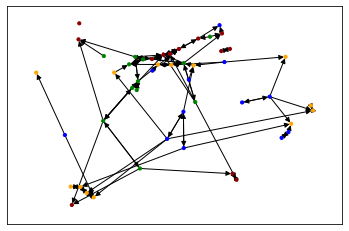

In [3]:
DrawGraph(graph)

In [8]:
edges = graph.edges()
Inflation.DeployInflationToRandomNode(graph, 2)

averagePriceVector = MarketMacro.CalculateAveragePrice(graph)
print(averagePriceVector)

{'Squares': 1.0, 'Triangles': 1.0, 'Circles': 1.0, 'Stars': 1.0434782608695652}


(<__main__.AgentBase object at 0x000001FD93936DF0>, <__main__.AgentBase object at 0x000001FD93941430>, {'price': 2})


In [24]:
%run MarketMacro.ipynb
edges = graph.edges()
averagePriceVector = MarketMacro.CalculateAveragePrice(graph)
print(averagePriceVector)

{'Squares': 1.0, 'Triangles': 1.0, 'Circles': 1.0, 'Stars': 1.0}
